# <p align="center"> Create  A Simple Database with current tools </p>

The goal of this overall task is to do the first round of extracting data from the archive data hosted in the Object Store.





In [3]:
import os
from pathlib import Path
import sys

rootPath = Path( os.getcwd(), "../..").resolve()
dataPath = Path( os.getcwd(), "../../data" ).resolve()
outputPath = Path( os.getcwd(), "../../output").resolve()
treeDirPath = outputPath / "ObjectStore/XChem/PerProj/data/tree"

print(f"Root Path: { rootPath }")
print(f"  Data Path: {dataPath}")
print(f"  Output Path: {outputPath}")
print(f"    Tree Objects Path: {treeDirPath}")

sys.path.append(  str(rootPath) ) 

Root Path: D:\OneDrive - University of Edinburgh\Documents\000-PhDCodeSpace\XAIDA\XAIDA
  Data Path: D:\OneDrive - University of Edinburgh\Documents\000-PhDCodeSpace\XAIDA\XAIDA\data
  Output Path: D:\OneDrive - University of Edinburgh\Documents\000-PhDCodeSpace\XAIDA\XAIDA\output
    Tree Objects Path: D:\OneDrive - University of Edinburgh\Documents\000-PhDCodeSpace\XAIDA\XAIDA\output\ObjectStore\XChem\PerProj\data\tree


---

### Open an example session to get a better feeling of where do  the files live    

In [17]:
from scripts.filesUtils import loadPickle

lstOfTrees = list( treeDirPath.iterdir() )

treeFilePath = Path( lstOfTrees[2] )
treeFileName = treeFilePath.name
print( f"Session Being Looked at: {treeFileName}")
treeObj = loadPickle( treeFilePath )


Session Being Looked at: tree_2015_lb13320-1.pkl


In [21]:
import re
from scripts.objFileSys import viewSubtree

folderID = [0, 0, 0, 0, 7, 0,  ]#[0, 0, 0, 0, 2, 0]
depth = len( folderID) + 2# treeObj["folderTreeMaxDepth"] + 2

files = viewSubtree( treeObj["fileTree"], treeObj["foldersCount"], 1, depth, folderID = folderID, viewFiles = True , getFilePathS= True)

print( [ file for file in files if re.search( "soakDBDataFile.sqlite$", file) ] )


data
└── 2015
    └── lb13320-1
        └── processing
            └── database
                └── DataFileBackups
                    ├── [0-f] soakDBDataFile.sqlite
                    ├── [1-f] soakDBDataFile_20160516155544.sqlite
                    ├── [2-f] soakDBDataFile_20160516155545.sqlite
                    ├── [3-f] soakDBDataFile_20160516155801.sqlite
                    ├── [4-f] soakDBDataFile_20160516162112.sqlite
                    ├── [5-f] soakDBDataFile_20160516162115.sqlite
                    ├── [6-f] soakDBDataFile_20160516162116.sqlite
                    ├── [7-f] soakDBDataFile_20160516162316.sqlite
                    ├── [8-f] soakDBDataFile_20160516162356.sqlite
                    ├── [9-f] soakDBDataFile_20160516162536.sqlite
                    ├── [10-f] soakDBDataFile_20160516162538.sqlite
                    ├── [11-f] soakDBDataFile_20160516162550.sqlite
                    ├── [12-f] soakDBDataFile_20160516162600.sqlite
                    ├── [

### Filter away projects with less than 20 files 

In [4]:
objKeysPath = outputPath /  "ObjectStore/XChem/PerProj/data"

# lstKeysPklPaths = list( objKeysPath.iterdir() )


perProjFileCount = {}
for pklPath in objKeysPath.iterdir():
    if pklPath.is_file():

        fileName = pklPath.name[:-4]

        lstPathS = loadPickle( os.path.join( pklPath ) )

        pathsNumber = len( lstPathS )

        perProjFileCount[fileName] = pathsNumber 

In [5]:
filteredProjs = list( dict( filter( lambda item: item[1]>= 20 and item[0][:4] == "2017", perProjFileCount.items()) ).keys() )

print(f"Fileterd Project List: {filteredProjs} ")

# print( f"Original: {perProjFileCount}" )

# print( f"Filter: {dict( filter( lambda item: item[1]>= 20 and item[0][:4] == "2017", perProjFileCount.items()) )}" )


Fileterd Project List: ['2017_lb13385-100', '2017_lb13385-102', '2017_lb13385-103', '2017_lb13385-106', '2017_lb13385-107', '2017_lb13385-108', '2017_lb13385-109', '2017_lb13385-110', '2017_lb13385-111', '2017_lb13385-85', '2017_lb13385-86', '2017_lb13385-87', '2017_lb13385-88', '2017_lb13385-90', '2017_lb13385-95', '2017_lb13385-96', '2017_lb13385-97', '2017_lb13385-98', '2017_lb13385-99', '2017_lb16813-1', '2017_lb16816-1', '2017_lb16949-10', '2017_lb16949-11', '2017_lb16949-12', '2017_lb16949-2', '2017_lb16949-3', '2017_lb16949-4', '2017_lb16949-7', '2017_lb16949-8', '2017_lb16949-9', '2017_lb16977-1', '2017_lb16978-1', '2017_lb16979-1', '2017_lb16980-1', '2017_lb16981-1', '2017_lb16981-3', '2017_lb16981-4', '2017_lb16988-1', '2017_lb17578-4', '2017_lb17623-1', '2017_lb17678-1', '2017_lb17805-1', '2017_lb17814-1', '2017_lb17876-1', '2017_lb17878-1', '2017_lb17884-1', '2017_lb18042-1', '2017_lb18102-1', '2017_lb18145-1', '2017_lb18145-10', '2017_lb18145-11', '2017_lb18145-12', '2017_

---

# Explore a few files to get a feel for it

In [251]:
from scripts.filesUtils import loadPickle
from scripts.objFileSys import viewSubtree
treeName = filteredProjs[0]
print(f"Viewing the following Sessions: {treeName}")

treeObj = loadPickle( treeDirPath / f"tree_{treeName}.pkl" )
folderID = [0, 0, 0, 1, 1, 0, 1, 2]
depth = len( folderID) + 2 # treeObj["folderTreeMaxDepth"] + 2 # 

viewSubtree( treeObj["fileTree"], treeObj["foldersCount"], 1, depth, folderID = folderID, viewFiles = True )

# Does not have any "modelled_structures" in panddas


Viewing the following Sessions: 2017_lb13385-100
data
└── 2017
    └── lb13385-100
        └── processing
            └── analysis
                └── initial_model
                    └── MMGLU2-x0002
                        └── dimple
                            └── dimple_rerun_on_selected_file


#### Session: 2017_lb13385-102

In [188]:
from scripts.filesUtils import loadPickle
from scripts.objFileSys import viewSubtree
treeName = filteredProjs[1]
print(f"Viewing the following Sessions: {treeName}")

treeObj = loadPickle( treeDirPath / f"tree_{treeName}.pkl" )
folderID = [0, 0, 0, 1, 1,   ]
depth = len( folderID) + 2 # treeObj["folderTreeMaxDepth"] + 2 # 

viewSubtree( treeObj["fileTree"], treeObj["foldersCount"], 1, depth, folderID = folderID, viewFiles = True )

Viewing the following Sessions: 2017_lb13385-102
data
└── 2017
    └── lb13385-102
        └── processing
            └── analysis
                ├── figure
                ├── initial_model
                ├── pandda_20220628
                ├── pandda_dataset_clustering
                ├── panddas
                ├── panddas-tk
                ├── panddas_full
                ├── panddas_new-model-tk
                ├── panddas_new-model_no-altConf-tk
                └── xce.log


#### Session: 2017_lb13385-108

In [231]:
from scripts.filesUtils import loadPickle
from scripts.objFileSys import viewSubtree
treeName = filteredProjs[5]
print(f"Viewing the following Sessions: {treeName}")

treeObj = loadPickle( treeDirPath / f"tree_{treeName}.pkl" )
folderID = [0, 0, 0, 1, 1, 2, 5   ]
depth = len( folderID) + 2 # treeObj["folderTreeMaxDepth"] + 2 # 

viewSubtree( treeObj["fileTree"], treeObj["foldersCount"], 1, depth, folderID = folderID, viewFiles = True )

Viewing the following Sessions: 2017_lb13385-108
data
└── 2017
    └── lb13385-108
        └── processing
            └── analysis
                └── panddas
                    └── processed_datasets
                        ├── JARID1BA-x0001
                        ├── JARID1BA-x0002
                        ├── JARID1BA-x0003
                        ├── JARID1BA-x0004
                        ├── JARID1BA-x0005
                        ├── JARID1BA-x0007
                        ├── JARID1BA-x0008
                        ├── JARID1BA-x0012
                        ├── JARID1BA-x0013
                        ├── JARID1BA-x0014
                        ├── JARID1BA-x0015
                        ├── JARID1BA-x0016
                        ├── JARID1BA-x0017
                        ├── JARID1BA-x0018
                        ├── JARID1BA-x0021
                        ├── JARID1BA-x0022
                        ├── JARID1BA-x0023
                        ├── JARID1BA-x0025
                        

#### Session: 2017_lb17578-4

In [394]:
from scripts.filesUtils import loadPickle
from scripts.objFileSys import viewSubtree
treeName = filteredProjs[38]
print(f"Viewing the following Sessions: {treeName}")

treeObj = loadPickle( treeDirPath / f"tree_{treeName}.pkl" )
folderID = [0, 0, 0, 0, 3, 0, 4] # 1 , 0, 9, 2]# 13, 0 ]
depth = len( folderID) +  2# treeObj["folderTreeMaxDepth"] + 2 # 

viewSubtree( treeObj["fileTree"], treeObj["foldersCount"], 1, depth, folderID = folderID, viewFiles = True )

Viewing the following Sessions: 2017_lb17578-4
data
└── 2017
    └── lb17578-4
        └── processing
            └── analysis
                └── initial_model
                    └── TMEMAB-x0028
                        ├── compound
                        ├── FMOPL000207a.cif
                        ├── FMOPL000207a.pdb
                        └── FMOPL000207a.png


In [398]:
from scripts.filesUtils import loadPickle
from scripts.objFileSys import viewSubtree
treeName = filteredProjs[38]
print(f"Viewing the following Sessions: {treeName}")

treeObj = loadPickle( treeDirPath / f"tree_{treeName}.pkl" )
folderID = [0, 0, 0, 0, 3,  ] # 1 , 0, 9, 2]# 13, 0 ]
depth = len( folderID) +  2# treeObj["folderTreeMaxDepth"] + 2 # 

viewSubtree( treeObj["fileTree"], treeObj["foldersCount"], 1, depth, folderID = folderID, viewFiles = True )

Viewing the following Sessions: 2017_lb17578-4
data
└── 2017
    └── lb17578-4
        └── processing
            └── analysis
                ├── initial_model
                ├── old_panddas
                ├── old_panddas6
                ├── old_panddas8
                ├── old_selectwaters
                ├── panddas
                ├── panddas_180122
                ├── panddas_180123
                ├── panddas_180124
                ├── panddas_180129
                ├── panddas_180207
                ├── panddas_good1
                └── xce.log


# - Create filters to identify right folders and files

### Filter Projects / Sessions of Interest

In [3]:
import re

from scripts.filesUtils import loadPickle
projTreeName = "2017_lb17578-4"# filteredProjs[38]
projDate = re.search( "^[0-9]+", projTreeName ).group()
projName = re.search( "[a-z][a-z][0-9]+", projTreeName).group()
subProjName = re.search( "[a-z0-9]$", projTreeName ).group()

print(f"Viewing the following Sessions: {projTreeName}")
print(f"Year: {projDate}\t Project Name: {projName}\t Project Subsection: {subProjName}")
projTreePath =  treeDirPath / f"tree_{projTreeName}.pkl" 
projTree = loadPickle( projTreePath )

Viewing the following Sessions: 2017_lb17578-4
Year: 2017	 Project Name: lb17578	 Project Subsection: 4


In [ ]:
from scripts.objFileSys import traceBackPath, openFolderwPath, completeTraceBackPath

projFolderPath = traceBackPath( f"{projName}-{subProjName}", projTree["fileTree"], projTree["foldersCount"], 4, startDepth = 3 ) #  

projFolderPath = projFolderPath[0] if projFolderPath else None

if projFolderPath:
    projFolderContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  projFolderPath )
    if "processing" in projFolderContent:
    
    if any( [ re.search(".*processing.*", folder ) for folder in projFolderContent]  ):
        pass 

    print(f"Project Folder:\t\t{projFolderPath}")
    print(f"Folders Content:\t{ projFolderContent }")

else:
    print("Could not fine item at specific depth")
    projFolderPaths = completeTraceBackPath( f"{projName}-{subProjName}", projTree["fileTree"], projTree["foldersCount"], 5 ) #  f"{projName}-{subProjName}"
    if projFolderPaths:
        projFolderContent = [ openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  path[0] ) for path in projFolderPaths]
        for idx in range( len(projFolderPaths) ):
            print(f"\tProject Folder:\t\t{projFolderPaths[idx][0]}")
            print(f"\tFolders Content:\t{ projFolderContent[idx]}")
    else:
        print("Could not find item anywhere")

Depth: 3
Project Folder:		data/2017/lb17578-4
Folders Content:	['processing', 'spool', 'readme.archived']


In [ ]:
from 

def findTargetIdxs(targetItem, tree,startDepth = 1, endDepth = 10, regexpression = None  ):
    


    targetLevel, supraFolderIdx, folderIdx = None, None, None
    for depth in range( startDepth, endDepth):
        flatFoldersList = pinchLevel( tree, depth, flat = True)
        if targetItem in flatFoldersList:                              # Use re.search() for regex
            foldersList = pinchLevel( tree, depth, flat = False )  # List of list representing the folders with subfolders in the current level
            IDSlst = [ ( idx, listOfFolders.index( targetItem) ) for idx, listOfFolders in enumerate( foldersList ) if targetItem in  listOfFolders ] # listOfFolders.index( targetFolder) -> Get the zero-index for the target folder inside its suprafolder | 
            supraFolderIdx, folderIdx = IDSlst[0] # 
            targetLevel = depth
            print(f"Depth: {depth}")
            break
        if depth == endDepth - 1: print("Could not find target item")

In [6]:
print( list( range( 1,2 )))

[1]


In [26]:
print( any([0,0,0, 1]))

True


---

## Obtain Most Simple code to get canonical data inside dataset

In [3]:
import re
projTreeName = "2017_lb17578-4"# filteredProjs[38]
projDate = re.search( "^[0-9]+", projTreeName ).group()
projName = re.search( "[a-z][a-z][0-9]+", projTreeName).group()
subProjName = re.search( "[a-z0-9]$", projTreeName ).group()

print(f"Viewing the following Sessions: {projTreeName}")
print(f"Year: {projDate}\t Project Name: {projName}\t Project Subsection: {subProjName}")
projTreePath =  treeDirPath / f"tree_{projTreeName}.pkl" 
projTree = loadPickle( projTreePath )

Viewing the following Sessions: 2017_lb17578-4
Year: 2017	 Project Name: lb17578	 Project Subsection: 4


In [4]:
from scripts.objFileSys import viewSubtree
folderID = [] # [0, 0, 0, 0, 3, 5, 6, 10] # 3, 0, 0] # 
viewSubtree( projTree["fileTree"] ,  projTree["foldersCount"], 1, len( folderID ) + 10 , folderID = folderID ,  folderPath = "data/2017/lb17578-4/processing/analysis/initial_model/TMEMAB-x0560/compound", 
                viewFiles  = True, getFileIDS = False, getFilePathS = False)

data
└── 2017
    └── lb17578-4
        └── processing
            └── analysis
                └── initial_model
                    └── TMEMAB-x0560
                        └── compound
                            ├── [0-f] OX-119.cif
                            ├── [1-f] OX-119.pdb
                            ├── [2-f] OX-119.png
                            ├── [3-f] OX-119.smiles
                            └── [4-f] OX-119_with_H.pdb


In [5]:
from scripts.objFileSys import traceBackPath, openFolderwPath # , completeTraceBackPath, pinchLevel
import re


obtainedPaths = { "metadata":[], "datasets":{} }
walkPath = None
projFolderPath = traceBackPath( f"{projName}-{subProjName}", projTree["fileTree"], projTree["foldersCount"], 4, startDepth = 3 )[0]
walkPath = projFolderPath
projFolderContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  projFolderPath )
if "processing" in projFolderContent:
    walkPath = walkPath + "/processing"
    projFolderContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  walkPath )

    if "analysis" in projFolderContent:
        analysisPath = walkPath + "/analysis"
        analysisContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  analysisPath )

        if ("initial_model" in analysisContent) != ("model_building" in analysisContent) : # XOR condition

            modelPath = analysisPath + "/initial_model" if "initial_model" in analysisContent else analysisPath + "/model_building"
            modelContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  modelPath )
            
            for dataset in modelContent:
                datasetFilePaths = { "compound.pdb": [], "compound.cif": [], "compound.smiles": [], "dimple.mtz": [], "dimple.pdb": [],
                "mean-map":[], "z_map" : [], "events": [] ,"pandda-model": [], }
                
                datasetPath = modelPath +f"/{dataset}"
                datasetContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  datasetPath )

                for item in datasetContent:
                    if item == "dimple.mtz": datasetFilePaths["dimple.mtz"].append(datasetPath +"/dimple.mtz" )
                    if re.search( "-pandda-input.mtz$", item): datasetFilePaths["dimple.mtz"].append(datasetPath + f"/{item}" )
                    if item == "dimple.pdb": datasetFilePaths["dimple.pdb"].append(datasetPath +"/dimple.pdb" )
                    if re.search( "-pandda-input.pdb$", item): datasetFilePaths["dimple.pdb"].append( datasetPath + f"/{item}" )
                    if re.search( "pandda-model.pdb$", item ): datasetFilePaths["pandda-model"].append(  datasetPath + f"/{item}" )
                    if re.search( "ground-state-average-map.native.ccp4$", item ): datasetFilePaths["mean-map"].append( datasetPath + f"/{item}" )
                    if re.search( "-ground-state-mean-map.native.ccp4$", item ): datasetFilePaths["mean-map"].append( datasetPath + f"/{item}" )
                    if re.search( "z_map.native.ccp4$", item ): datasetFilePaths["z_map"].append( datasetPath + item)
                    if re.search( ".+-event_.+-BDC_.+_map.native.ccp4$", item ): datasetFilePaths["events"].append( datasetPath + f"/{item}" )
                    if item == "compound":
                        compoundPath = datasetPath + "/compound"
                        compoundContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"], compoundPath )
                        for compoundItem in compoundContent:
                            if re.search( ".+pdb$", compoundItem): datasetFilePaths["compound.pdb"].append( compoundPath + f"/{compoundItem}" )
                            if re.search( ".+cif$", compoundItem): datasetFilePaths["compound.cif"].append( compoundPath + f"/{compoundItem}" )
                            if re.search( ".+smiles$", compoundItem): datasetFilePaths["compound.smiles"].append( compoundPath + f"/{compoundItem}" )
            
                obtainedPaths["datasets"][f"{dataset}"] = datasetFilePaths



        elif "initial_model" in projFolderContent and "model_building" in projFolderContent:
            print(f"There is \"initial_model\" and \"model_building\" folders inside { analysisPath }")
        
        else: 
            print(f"There is NO \"initial_model\" NOR \"model_building\" folders inside { analysisPath }")
    else:
        print(f"There is no \"analysis\" folder inside { walkPath }")
    
    if "database" in projFolderContent:
        dbPath = walkPath + "/database"
        dbContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  dbPath )
        for item in dbContent:
            if re.search( ".sqlite$", item): obtainedPaths["metadata"].append( item )

    else:
        print(f"There is no \"database\" folder inside {walkPath}")

else:
    print(f"There is no \"processing\" folder inside {walkPath}")

In [ ]:
# print( idx)

81


In [6]:
idx = 0

In [7]:
print( "Metadata:")
for item in obtainedPaths["metadata"]: print( item)

Metadata:
soakDBDataFile.sqlite
soakDBDataFile.sqlite



In [13]:
dataset = list(obtainedPaths["datasets"].keys())[idx]

print(f"Currently looking at dataset: {dataset}" )
for key in obtainedPaths["datasets"][dataset].keys(): print( f"{key}: {obtainedPaths["datasets"][dataset][key]}")

idx += 1

Currently looking at dataset: TMEMAB-x0029
compound.pdb: ['data/2017/lb17578-4/processing/analysis/initial_model/TMEMAB-x0029/compound/XST00000847b.pdb']
compound.cif: ['data/2017/lb17578-4/processing/analysis/initial_model/TMEMAB-x0029/compound/XST00000847b.cif']
compound.smiles: ['data/2017/lb17578-4/processing/analysis/initial_model/TMEMAB-x0029/compound/XST00000847b.smiles']
dimple.mtz: ['data/2017/lb17578-4/processing/analysis/initial_model/TMEMAB-x0029/TMEMAB-x0029-pandda-input.mtz', 'data/2017/lb17578-4/processing/analysis/initial_model/TMEMAB-x0029/dimple.mtz']
dimple.pdb: ['data/2017/lb17578-4/processing/analysis/initial_model/TMEMAB-x0029/TMEMAB-x0029-pandda-input.pdb', 'data/2017/lb17578-4/processing/analysis/initial_model/TMEMAB-x0029/dimple.pdb']
mean-map: ['data/2017/lb17578-4/processing/analysis/initial_model/TMEMAB-x0029/TMEMAB-x0029-ground-state-mean-map.native.ccp4']
z_map: ['data/2017/lb17578-4/processing/analysis/initial_model/TMEMAB-x0029TMEMAB-x0029-z_map.native.c

In [175]:
from scripts.objFileSys import convertPathtoID
print( convertPathtoID( projTree["fileTree"], projTree["foldersCount"], f"data/2017/lb17578-4/processing/analysis/initial_model/{dataset}"))

[0, 0, 0, 0, 3, 0, 80]


In [762]:
from scripts.objFileSys import viewSubtree
folderID =  [0, 0, 0, 0,   ] # [0, 0, 0, 0, 3, 5, 6, 10] # 3, 0, 0] # 
folderPath = f"data/2017/lb17578-4/processing/analysis/initial_model/{dataset}"
viewSubtree( projTree["fileTree"] ,  projTree["foldersCount"], 1, len( folderID ) + 2, folderID = folderID ,  #  len( folderPath.split("/") + 2, folderPath = folderPath, #
                viewFiles  = True, getFileIDS = False, getFilePathS = False)
viewSubtree( projTree["fileTree"] ,  projTree["foldersCount"], len( folderID ) - 2, len( folderID ) + 1 , folderID = folderID , #  len( folderPath.split("/") + 2, folderPath = folderPath, #
                viewFiles  = True, getFileIDS = False, getFilePathS = False)

data
└── 2017
    └── lb17578-4
        └── processing
            ├── [0] 2018016
            ├── [1] TeXRank
            ├── [2] XCHEM
            ├── [3] analysis
            ├── [4] database
            ├── [5] lab36
            ├── [6] reference
            ├── [7] tmp
            ├── [8-f] 2018072014.txt
            ├── [9-f] 2018072014.txt.info.csv
            ├── [10-f] 2018081518.txt
            ├── [11-f] 2018081518.txt.info.csv
            ├── [12-f] 2018120714.txt
            ├── [13-f] 2018120714.txt.info.csv
            ├── [14-f] 2019100110.txt
            ├── [15-f] 2019100110.txt.info.csv
            ├── [16-f] README.reprocessing
            ├── [17-f] Screenshot-ISPyB » Data Collections » i04-1 » lb17578-5 - Mozilla Firefox.png
            ├── [18-f] prepareVisit.log
            ├── [19-f] transfer_pandda_data.done
            ├── [20-f] xce.log
            └── [21-f] xchempaths
2017
└── lb17578-4
    └── processing


### Turn it into a function

In [16]:
def canonicalExtract( projName, subProjName, treeObj):
    
    projTree = treeObj
    obtainedPaths = { "session": f"{projName}-{subProjName}", "metadata":[], "datasets":{} }
    
    walkPath = None
    try:
        projFolderPath = traceBackPath( f"{projName}-{subProjName}", projTree["fileTree"], projTree["foldersCount"], 4, startDepth = 3 )[0]
    except:
        print( f"Could not find \"{projName}-{subProjName}\" at depth 3.")

    walkPath = projFolderPath
    projFolderContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  projFolderPath )

    if "processing" in projFolderContent:
        walkPath = walkPath + "/processing"
        projFolderContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  walkPath )

        if "analysis" in projFolderContent:
            analysisPath = walkPath + "/analysis"
            analysisContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  analysisPath )

            if ("initial_model" in analysisContent) != ("model_building" in analysisContent) : # XOR condition

                modelPath = analysisPath + "/initial_model" if "initial_model" in analysisContent else analysisPath + "/model_building"
                modelContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  modelPath )
                
                for dataset in modelContent:
                    datasetFilePaths = { "compound.pdb": [], "compound.cif": [], "compound.smiles": [], "dimple.mtz": [], "dimple.pdb": [],
                    "mean-map":[], "z_map" : [], "events": [] ,"pandda-model": [], }
                    
                    datasetPath = modelPath +f"/{dataset}"
                    datasetContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  datasetPath )

                    for item in datasetContent:
                        if item == "dimple.mtz": datasetFilePaths["dimple.mtz"].append(datasetPath +"/dimple.mtz" )
                        if re.search( "-pandda-input.mtz$", item): datasetFilePaths["dimple.mtz"].append(datasetPath + f"/{item}" )
                        if item == "dimple.pdb": datasetFilePaths["dimple.pdb"].append(datasetPath +"/dimple.pdb" )
                        if re.search( "-pandda-input.pdb$", item): datasetFilePaths["dimple.pdb"].append( datasetPath + f"/{item}" )
                        if re.search( "pandda-model.pdb$", item ): datasetFilePaths["pandda-model"].append(  datasetPath + f"/{item}" )
                        if re.search( "ground-state-average-map.native.ccp4$", item ): datasetFilePaths["mean-map"].append( datasetPath + f"/{item}" )
                        if re.search( "-ground-state-mean-map.native.ccp4$", item ): datasetFilePaths["mean-map"].append( datasetPath + f"/{item}" )
                        if re.search( "z_map.native.ccp4$", item ): datasetFilePaths["z_map"].append( datasetPath + item)
                        if re.search( ".+-event_.+-BDC_.+_map.native.ccp4$", item ): datasetFilePaths["events"].append( datasetPath + f"/{item}" )
                        if item == "compound":
                            compoundPath = datasetPath + "/compound"
                            compoundContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"], compoundPath )
                            for compoundItem in compoundContent:
                                if re.search( ".+pdb$", compoundItem): datasetFilePaths["compound.pdb"].append( compoundPath + f"/{compoundItem}" )
                                if re.search( ".+cif$", compoundItem): datasetFilePaths["compound.cif"].append( compoundPath + f"/{compoundItem}" )
                                if re.search( ".+smiles$", compoundItem): datasetFilePaths["compound.smiles"].append( compoundPath + f"/{compoundItem}" )
                
                    obtainedPaths["datasets"][f"{dataset}"] = datasetFilePaths



            elif "initial_model" in projFolderContent and "model_building" in projFolderContent:
                print(f"There is \"initial_model\" and \"model_building\" folders inside { analysisPath }")
                obtainedPaths[ "datasets" ] = None
            
            else: 
                print(f"There is NO \"initial_model\" NOR \"model_building\" folders inside { analysisPath }")
                obtainedPaths[ "datasets" ] = None
        else:
            print(f"There is no \"analysis\" folder inside { walkPath }")
            obtainedPaths[ "datasets" ] = None

        
        if "database" in projFolderContent:
            dbPath = walkPath + "/database"
            dbContent = openFolderwPath( projTree["fileTree"], projTree["foldersCount"],  dbPath )
            for item in dbContent:
                if re.search( ".sqlite$", item): obtainedPaths["metadata"].append( dbPath + f"/{item}" )

        else:
            print(f"There is no \"database\" folder inside {walkPath}")
            obtainedPaths[ "metadata" ] = None

    else:
        print(f"There is no \"processing\" folder inside {walkPath}")
        return None
    
    return obtainedPaths

In [163]:
import re
projTreeName = "2017_lb17578-4"# filteredProjs[38]
projDate = re.search( "^[0-9]+", projTreeName ).group()

projName = re.search( "[a-z][a-z][0-9]+", projTreeName).group()
subProjName = re.search( "[a-z0-9]$", projTreeName ).group()
projTreePath =  treeDirPath / f"tree_{projTreeName}.pkl" 
treeObj = loadPickle( projTreePath )
projTree = loadPickle( projTreePath )

print(f"Viewing the following Sessions: {projTreeName}")
print(f"Year: {projDate}\t Project Name: {projName}\t Project Subsection: {subProjName}")



Viewing the following Sessions: 2017_lb17578-4
Year: 2017	 Project Name: lb17578	 Project Subsection: 4


In [18]:
obtainedPaths = canonicalExtract( projName, subProjName, treeObj)

In [157]:
idx = 0

In [158]:
print( f"Project Name: {obtainedPaths["session"]}\n" )
print( "Metadata:")
for item in obtainedPaths["metadata"]: print( f"\t{item}")

Project Name: lb30852-1

Metadata:
	data/lb30852/lb30852-1/processing/database/soakDBDataFile.sqlite


In [159]:
dataset = list(obtainedPaths["datasets"].keys())[idx]

print(f"Currently looking at dataset: {dataset}" )
for key in obtainedPaths["datasets"][dataset].keys(): print( f"{key}: {obtainedPaths["datasets"][dataset][key]}")

idx += 1

Currently looking at dataset: AroB-x0001
compound.pdb: []
compound.cif: []
compound.smiles: []
dimple.mtz: []
dimple.pdb: []
mean-map: []
z_map: []
events: []
pandda-model: []


In [ ]:
from scripts.objFileSys import convertPathtoID
print( convertPathtoID( projTree["fileTree"], projTree["foldersCount"], f"data/2017/lb17578-4/processing/analysis/initial_model/{dataset}"))

[0, 0, 0, 0, 3, 0, 80]


In [181]:
from scripts.objFileSys import viewSubtree
folderID =  [0, 0, 0, 0, 3 , 0, 3 ] # [0, 0, 0, 0, 3, 5, 6, 10] # 3, 0, 0] # 
folderPath = f"data/2017/lb17578-4/processing/analysis/initial_model/{dataset}"
viewSubtree( projTree["fileTree"] ,  projTree["foldersCount"], 1, len( folderID ) + 2, folderID = folderID ,  #  len( folderPath.split("/") + 2, folderPath = folderPath, #
                viewFiles  = True, getFileIDS = False, getFilePathS = False)

folderID =  [0, 0, 0, 0, 3 , 0, 3 , 2, 0, 0 ]
viewSubtree( projTree["fileTree"] ,  projTree["foldersCount"], len( folderID ) - 2, len( folderID ) + 2 , folderID = folderID , #  len( folderPath.split("/") + 2, folderPath = folderPath, #
                viewFiles  = True, getFileIDS = False, getFilePathS = False)

data
└── 2017
    └── lb17578-4
        └── processing
            └── analysis
                └── initial_model
                    └── TMEMAB-x0027
                        ├── [0] autoprocessing
                        ├── [1] compound
                        ├── [2] dimple
                        ├── [3-f] 2fofc.map
                        ├── [4-f] FMOPL000001a.cif
                        ├── [5-f] FMOPL000001a.pdb
                        ├── [6-f] FMOPL000001a.png
                        ├── [7-f] TMEMAB-x0027.free.mtz
                        ├── [8-f] TMEMAB-x0027.log
                        ├── [9-f] TMEMAB-x0027.mtz
                        ├── [10-f] dimple.mtz
                        ├── [11-f] dimple.pdb
                        └── [12-f] fofc.map
dimple
└── dimple_rerun_on_selected_file
    └── dimple
        ├── [0-f] 01-rwcontents.log
        ├── [1-f] 02-pointless.log
        ├── [2-f] 03-truncate.log
        ├── [3-f] 04-refmac5_rigid.log
        ├── [4-f] 05-unique.log

In [ ]:
from scripts.objFileSys import viewSubtree
folderID =  [0, 0, 0, 0, 3 , 0, 3 ] # [0, 0, 0, 0, 3, 5, 6, 10] # 3, 0, 0] # 
folderPath = f"data/2017/lb17578-4/processing/analysis/initial_model/{dataset}"
viewSubtree( projTree["fileTree"] ,  projTree["foldersCount"], 1, len( folderID ) + 2, folderID = folderID ,  #  len( folderPath.split("/") + 2, folderPath = folderPath, #
                viewFiles  = True, getFileIDS = False, getFilePathS = False)

folderID =  [0, 0, 0, 0, 3 , 0, 3 , 2, 0, 0 ]
viewSubtree( projTree["fileTree"] ,  projTree["foldersCount"], len( folderID ) - 2, len( folderID ) + 2 , folderID = folderID , #  len( folderPath.split("/") + 2, folderPath = folderPath, #
                viewFiles  = True, getFileIDS = False, getFilePathS = False)

# folderID =  [0, 0, 0, 0,   ]
# viewSubtree( projTree["fileTree"] ,  projTree["foldersCount"], len( folderID ) - 2, len( folderID ) + 1 , folderID = folderID , #  len( folderPath.split("/") + 2, folderPath = folderPath, #
#                 viewFiles  = True, getFileIDS = False, getFilePathS = False)

data
└── 2017
    └── lb17578-4
        └── processing
            └── analysis
                └── initial_model
                    └── TMEMAB-x0027
                        ├── [0] autoprocessing
                        ├── [1] compound
                        ├── [2] dimple
                        ├── [3-f] 2fofc.map
                        ├── [4-f] FMOPL000001a.cif
                        ├── [5-f] FMOPL000001a.pdb
                        ├── [6-f] FMOPL000001a.png
                        ├── [7-f] TMEMAB-x0027.free.mtz
                        ├── [8-f] TMEMAB-x0027.log
                        ├── [9-f] TMEMAB-x0027.mtz
                        ├── [10-f] dimple.mtz
                        ├── [11-f] dimple.pdb
                        └── [12-f] fofc.map
dimple
└── dimple_rerun_on_selected_file
    └── dimple
        ├── [0-f] 01-rwcontents.log
        ├── [1-f] 02-pointless.log
        ├── [2-f] 03-truncate.log
        ├── [3-f] 04-refmac5_rigid.log
        ├── [4-f] 05-unique.log

### Run for all the projects identified

In [5]:
from scripts.filesUtils import loadPickle

dataPath = Path( os.getcwd(), "../../data" ).resolve()
outputPath = Path( os.getcwd(), "../../output").resolve()
rootPath = Path( os.getcwd(), "../..").resolve()

treeDirPath = outputPath / "ObjectStore/XChem/PerProj/data/tree"
lstOfTrees = list( treeDirPath.iterdir() )

print( lstOfTrees[0].name )

# treeFilePath = Path( lstOfTrees[0] )
# treeFileName = treeFilePath.name
# print( f"Session Being Looked at: {treeFileName}")
# treeObj = loadPickle( treeFilePath )

tree_2015_lb13308-1.pkl


In [21]:
import os
import re
import pickle
from pathlib import Path

from scripts.filesUtils import loadPickle
from scripts.createdb import canonicalExtract

dataPath = Path( os.getcwd(), "../../data" ).resolve()
outputPath = Path( os.getcwd(), "../../output" ).resolve()
treeDirPath = outputPath / "ObjectStore/XChem/PerProj/data/tree"

pathsDB = dataPath / "myDBpaths"
pathsDB.mkdir( parents = True, exist_ok = True ) 

# count = 0
for treePklFilePath in treeDirPath.iterdir():
    if True: # count != 5:
        treePklFileName = treePklFilePath.name
        # print( treePklFileName)
        if not re.search( "_[0-9]+_", treePklFileName ):
            projDate = "No Date"
            
        else:
            projDate = re.search( "_[0-9]+_", treePklFileName ).group()[1:-1]

        projName = re.search( "_[a-z][a-z][0-9]+-", treePklFileName).group()[1:-1]
        subProjName = re.search( "-[a-z0-9]+\\.pkl$", treePklFileName ).group()[1:-4]

        # print( projDate, projName, subProjName )
        treeObj = loadPickle( treePklFilePath )

        obtainedPaths = canonicalExtract( projName, subProjName, treeObj)
        if obtainedPaths:
            if obtainedPaths[ "datasets" ]:
                with open( pathsDB / f"paths_{treePklFilePath.name[5:-4]}.pkl", "wb" ) as f:
                    pickle.dump( obtainedPaths, f )



        # count += 1
    else:

        break
    

There is no "analysis" folder inside data/2015/lb13308-1/processing
There is no "analysis" folder inside data/2015/lb13308-2/processing
There is no "database" folder inside data/2015/lb13308-2/processing
Found Model in lb13320-1.
There is no "analysis" folder inside data/2015/lb13320-12/processing
There is no "database" folder inside data/2015/lb13320-12/processing
There is no "analysis" folder inside data/2015/lb13320-3/processing
There is no "database" folder inside data/2015/lb13320-3/processing
There is no "analysis" folder inside data/2015/lb13320-5/processing
There is no "database" folder inside data/2015/lb13320-5/processing
There is no "analysis" folder inside data/2015/lb13320-8/processing
There is no "database" folder inside data/2015/lb13320-8/processing
Found Model in lb13379-1.
Found Model in lb13380-1.
Found Model in lb13381-1.
There is NO "initial_model" NOR "model_building" folders inside data/2015/lb13385-1/processing/analysis
Found Model in lb13385-13.
Found Model in 

### Find why there is an error

In [5]:
import re

from pathlib import Path

for treePklFile in treeDirPath.iterdir():
    if re.search( "lb13385-52", treePklFile.name):
        print(treePklFile.name )

tree_2016_lb13385-52.pkl


In [8]:
idx = 0

In [9]:
from scripts.filesUtils import loadPickle
from scripts.objFileSys import viewSubtree

errorTree = loadPickle( treeDirPath / "tree_2016_lb13385-52.pkl" )
folderID = [0, 0,]# 0, 0,]# 1, 7, ]# idx ]
viewSubtree( errorTree["fileTree"], errorTree["foldersCount"], 1, len( folderID ) + 2, folderID = folderID, 
            showIndex = True, viewFiles = True)
idx += 1

data
└── 2016
    └── [0-f] lb13385-52


In [11]:
from scripts.objFileSys import convertIDtoPath

convertIDtoPath( errorTree["fileTree"], errorTree["foldersCount"], [0, 0, 0 ] )

'data/2016/lb13385-52'

In [16]:
from scripts.objFileSys import openFolderwPath, convertIDtoPath

datasetPath  = convertIDtoPath( errorTree["fileTree"], errorTree["foldersCount"], [0, 0, 0  ] )
print( datasetPath )

datasetContent = openFolderwPath( errorTree["fileTree"], errorTree["foldersCount"], datasetPath )
print( datasetContent )

data/2016/lb13385-52
[]


In [20]:
print( pathsDB  )

for file in pathsDB.iterdir():
    file.unlink()

D:\Documents\XAIDA\data\myDBpaths


### Stats

In [ ]:
inputSet = set( [ re.search( "_[0-9a-z]+_[0-9a-z]+-[0-9]+\\.pkl$", file.name ).group()[1:-4] for file in treeDirPath.iterdir()  ]  )
successSet = set( [ re.search( "_[0-9a-z]+_[0-9a-z]+-[0-9]+\\.pkl$", file.name).group()[1:-4] for file in pathsDB.iterdir() ] )
failedSet =  inputSet.difference( successSet ) 

print(f"Initial Number of Files: {len(inputSet) }\nNumber of Successes: {len(successSet)}\nNumber of Fails: {len(failedSet)}")
print( f"Percentage of success: {round( len(successSet) / len( inputSet) , 2)}")


Initial Number of Files: 738
Number of Successes: 250
Number of Fails: 488
Percentage of success: 0.34
Total Number of Files of Paths objects: 250


In [88]:
# statsDic = {"projNames":[], "metadata" : [], "numbDatasets": [],"numbComps": [], "numbDimples": [],"numbDimple&Comps": [],"numbPanddaModels" : [], }

statsDic = {"projNames":[],  # 
            "metadata" : [],
             "numbDatasets": [],
             "numbComps": [], 
             "numbDimples": [],
             "numbDimple&Comps": [],
             "numbPanddaModels" : [],
            }
 

for file in pathsDB.iterdir():
    dicOfPaths = loadPickle( file )

    # print( dicOfPaths["session"] )
    # print( dicOfPaths["metadata"] )


    if dicOfPaths["metadata"] != []:
        statsDic["metadata"].append( True )

    numbDatasets = len( dicOfPaths["datasets"].keys() )
    numbComp = len( [True for dataset in dicOfPaths["datasets"].keys() if
                             dicOfPaths["datasets"][dataset]["compound.pdb"] != [] and
                             dicOfPaths["datasets"][dataset]["compound.cif"] != [] and
                             dicOfPaths["datasets"][dataset]["compound.smiles"] != [] 
                             ] )
    numbDimple = len( [True for dataset in dicOfPaths["datasets"].keys() if
                             dicOfPaths["datasets"][dataset]["dimple.mtz"] != [] and
                             dicOfPaths["datasets"][dataset]["dimple.pdb"] != [] 
                             ] )
    numbDimpleComps = len( [True for dataset in dicOfPaths["datasets"].keys() if
                             dicOfPaths["datasets"][dataset]["dimple.mtz"] != [] and
                             dicOfPaths["datasets"][dataset]["dimple.pdb"] != [] and
                             dicOfPaths["datasets"][dataset]["compound.pdb"] != [] and
                             dicOfPaths["datasets"][dataset]["compound.cif"] != [] and
                             dicOfPaths["datasets"][dataset]["compound.smiles"] != [] 
                             ] )
    numbPanddaModels = len( [True for dataset in dicOfPaths["datasets"].keys() if dicOfPaths["datasets"][dataset]["pandda-model"] != [] ] )

    statsDic["projNames"].append( dicOfPaths["session"] )
    statsDic["numbDatasets"].append( numbDatasets )
    statsDic["numbComps"].append( numbComp )
    statsDic["numbDimples"].append( numbDimple )
    statsDic["numbDimple&Comps"].append( numbDimpleComps  )    
    statsDic["numbPanddaModels"].append( numbPanddaModels )








print( f"Number of Projects: { len( statsDic["projNames"] ) }" )

Number of Projects: 250


65.1 0.0 3342.0 1.0
95.55 0.0 3215.0 0.0
142.8 0.0 706.0 0.0
150.15 0.0 574.0 0.0
152.25 0.0 1085.0 0.0


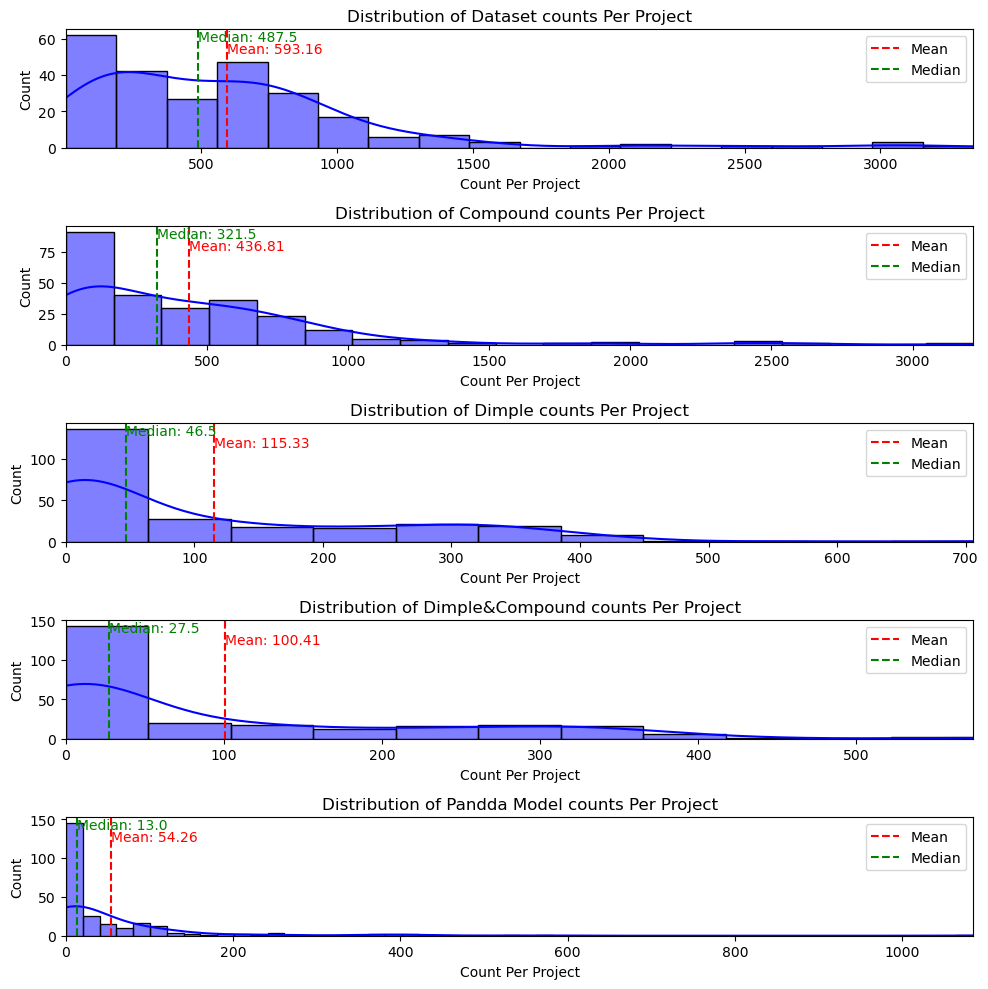

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numbProjs = len( statsDic["projNames"] )
numbMetadata = len( [True for item in statsDic["metadata"] if item] )
# look at the distributions of the number of datasets, compounds, dimples, pandda models and dimple&compounds all centered around the mean
# Plot distributions for various metrics
metrics = ["numbDatasets", "numbComps", "numbDimples", "numbDimple&Comps", "numbPanddaModels"]
titles = ["Distribution of Dataset counts Per Project", "Distribution of Compound counts Per Project",
           "Distribution of Dimple counts Per Project", "Distribution of Dimple&Compound counts Per Project",
           "Distribution of Pandda Model counts Per Project"]


fig, axes = plt.subplots(len(metrics), 1, figsize=( 10, 10), sharey= False)

for i, metric in enumerate(metrics):
    
    sns.histplot(statsDic[metric], kde=True, ax=axes[i], color="blue")

    axes[i].axvline(x=np.mean(statsDic[metric]) , color="red", linestyle="--", label="Mean")
    axes[i].axvline(x=np.median(statsDic[metric]) , color="green", linestyle="--", label="Median")



    axes[i].set_title( titles[i] )
    axes[i].set_xlabel( "Count Per Project" )
    quantile = [0.0, 1]
    axes[i].set_xlim( np.quantile(statsDic[metric], quantile[0]) , np.quantile(statsDic[metric], quantile[1]) )
    axes[i].legend()

    y_max = axes[i].get_ylim()[1]
    y_min = axes[i].get_ylim()[0]
    x_max = axes[i].get_xlim()[1]
    x_min = axes[i].get_xlim()[0]

    print( y_max, y_min, x_max, x_min )
    axes[i].text(np.mean(statsDic[metric]), y_max*0.8, f"Mean: {np.round(np.mean(statsDic[metric]), 2)}", color="red")
    axes[i].text(np.median(statsDic[metric]) , y_max*0.9, f"Median: {np.round(np.median(statsDic[metric]), 2)}", color="green")

    # Get max and min values of the y- and x-axis




    # axes[i].grid(True)

plt.tight_layout()




In [104]:
zerosCount = statsDic["numbPanddaModels"] .count(0)
zeroPanddaModelProjs = [ statsDic["projNames"][idx] for idx, item in enumerate( statsDic["numbPanddaModels"]) if item == 0 ]
print( f"Projects with 0 pandda models: {zeroPanddaModelProjs}")
print( f"There are {zerosCount} / {len(statsDic['numbPanddaModels'])} projects with 0 pandda models out of {len(statsDic['numbPanddaModels'])} projects")
print( f"This means {round( zerosCount / len(statsDic['numbPanddaModels']) * 100, 2)}% of the projects have 0 pandda models")

Projects with 0 pandda models: ['lb13385-2', 'lb13385-40', 'lb13385-54', 'lb13385-57', 'lb13385-59', 'lb13385-67', 'lb13385-69', 'lb13385-70', 'lb13385-71', 'lb14321-8', 'lb14379-1', 'lb15511-1', 'lb15649-1', 'lb15751-1', 'lb13385-100', 'lb13385-108', 'lb13385-96', 'lb16949-3', 'lb16949-7', 'lb16949-8', 'lb16949-9', 'lb16978-1', 'lb16988-1', 'lb17876-1', 'lb17878-1', 'lb18145-10', 'lb18145-31', 'lb18145-35', 'lb18145-44', 'lb18145-5', 'lb18145-6', 'lb16949-21', 'lb18145-100', 'lb18145-62', 'lb18145-68', 'lb19204-1', 'lb19758-1', 'lb19758-17', 'lb19758-20', 'lb19758-6', 'lb20208-1', 'lb20990-1', 'lb18145-123', 'lb19758-23', 'lb19758-26', 'lb19758-29', 'lb19758-30', 'lb19758-33', 'lb20395-1', 'lb22715-7', 'lb22742-3', 'lb24383-1', 'lb24500-4', 'lb24544-1', 'sw20020-61', 'lb19758-37', 'lb19758-41', 'lb19758-42', 'lb19758-51', 'lb22742-1', 'lb23457-5', 'lb25544-1', 'lb25874-6', 'lb25897-3', 'lb26986-12', 'lb27009-1', 'sw24758-9', 'sw25092-9', 'sw26557-1', 'lb18145-163', 'lb18145-174', 'lb1

In [ ]:
zeroFiles = []

for zeroProj in zeroPanddaModelProjs:
    zeroFiles.extend(  [ file for file in treeDirPath.iterdir() if re.search( f"{zeroProj}", file.name) ] )  


Zero Files: [WindowsPath('D:/Documents/XAIDA/output/ObjectStore/XChem/PerProj/data/tree/tree_2015_lb13385-2.pkl'), WindowsPath('D:/Documents/XAIDA/output/ObjectStore/XChem/PerProj/data/tree/tree_2015_lb13385-21.pkl'), WindowsPath('D:/Documents/XAIDA/output/ObjectStore/XChem/PerProj/data/tree/tree_2016_lb13385-25.pkl'), WindowsPath('D:/Documents/XAIDA/output/ObjectStore/XChem/PerProj/data/tree/tree_2016_lb13385-40.pkl'), WindowsPath('D:/Documents/XAIDA/output/ObjectStore/XChem/PerProj/data/tree/tree_2016_lb13385-54.pkl'), WindowsPath('D:/Documents/XAIDA/output/ObjectStore/XChem/PerProj/data/tree/tree_2016_lb13385-57.pkl'), WindowsPath('D:/Documents/XAIDA/output/ObjectStore/XChem/PerProj/data/tree/tree_2016_lb13385-59.pkl'), WindowsPath('D:/Documents/XAIDA/output/ObjectStore/XChem/PerProj/data/tree/tree_2016_lb13385-67.pkl'), WindowsPath('D:/Documents/XAIDA/output/ObjectStore/XChem/PerProj/data/tree/tree_2016_lb13385-69.pkl'), WindowsPath('D:/Documents/XAIDA/output/ObjectStore/XChem/PerP

In [154]:
from scripts.filesUtils import loadPickle
from scripts.objFileSys import viewSubtree

file = zeroFiles[0]
treeObj = loadPickle( file )
folderID = [0, 0, 0, 1, 1, 0,  731, ] #3, 0, 0]

viewSubtree( treeObj["fileTree"], treeObj["foldersCount"], 1, len( folderID ) + 2, folderID = folderID,
            showIndex = True, viewFiles = True)

data
└── 2015
    └── lb13385-2
        └── processing
            └── analysis
                └── initial_model
                    └── ATAD2A-x961
                        ├── [0] Dimple
                        ├── [1] autoprocessing
                        ├── [2] compound
                        ├── [3] dimple
                        ├── [4-f] 2fofc.map
                        ├── [5-f] ATAD2A-x961.free.mtz
                        └── [6-f] fofc.map


### Check if dimple is a symb link

In [182]:

for file in pathsDB.iterdir():
    dicOfPaths = loadPickle( file )
    for dataset in dicOfPaths["datasets"].keys():
        if dicOfPaths["datasets"][dataset]["dimple.pdb"] != []:
            print( dicOfPaths["datasets"][dataset]["dimple.pdb"] )
            break
    break

['data/2015/lb13320-1/processing/analysis/initial_model/SHH-x1/dimple.pdb']


In [185]:
from scripts.s3Utils import initialize
bucket = "xchem"
key = "data/2015/lb13320-1/processing/analysis/initial_model/SHH-x1/dimple.mtz"
storePath = dataPath / "myDB" / "dimple.mtz"

client = initialize("XChem")
client.download_file( bucket, key, storePath.as_posix() ) 

In [192]:
print( storePath.parents[0].as_posix() )

D:/Documents/XAIDA/data/myDB


### Look at .sqlite to help identifying the data in pandda